<a href="https://colab.research.google.com/github/seyoung911/ClearWater/blob/master/Assignment05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt

path = "/content/drive/My Drive/Colab Notebooks/data.txt"

data    = np.genfromtxt(path, delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp


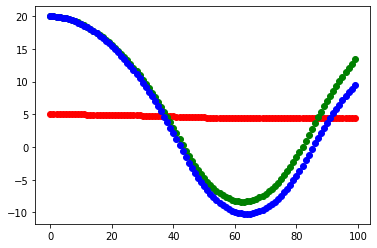

In [25]:
# logistic regression for binary classification 모든 진행과정에서의 세타0,1, 2값 plot
# 세타0 = 빨강/ 세타1 = 초록 /세타2 = 파랑

import matplotlib.pyplot as plt
import numpy as np
import random

trainingNum = M =  100

z_list = [] # w0 + w1*xi + w2*yi , 고정 w0, w1, w2에 대하여, x,y값 바뀔때 i번째의 z값// w0 w1  w2 업데이트 되면 list도 업데이트!

LR =0.001 # learning rate


sum0 = 0
sum1 = 0
sum2 = 0


# classifier. sigmoid 함수 작성
def sigmoid(zi) :
  return 1 / (1 + np.exp(-zi))

#Gradient Discent 직접 구현

w0 = 5
w1 = 20
w2 = 20
w0_list = []
w1_list = []
w2_list = []

cost_list = []
sum0_list = []
sum1_list = []
sum2_list = []

for i in range(trainingNum):
  w0_list.append(w0)
  w1_list.append(w1)
  w2_list.append(w2)
  z_list = []

  for j in range(trainingNum) : # 고정된 w0 w1 w2값 이용해서 z행렬 갱신!!
      z_list.append(w0_list[i] + w1_list[i]*x[j] + w2*y[j])
      
  for k in range(trainingNum) : #미분
      sum0 = sum0 + (sigmoid(z_list[k])-label[k])
      sum1 = sum1 + (sigmoid(z_list[k])-label[k])*x[k]
      sum2 = sum2 + (sigmoid(z_list[k])-label[k])*y[k]
  
  w0 = w0 - LR*sum0/M
  w1 = w1 - LR*sum1/M
  w2 = w2 - LR*sum2/M


plt.scatter([i for i in range(len(w0_list))],w0_list,color='red')
plt.scatter([i for i in range(len(w1_list))],w1_list,color='green')
plt.scatter([i for i in range(len(w2_list))],w2_list,color='blue')



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp


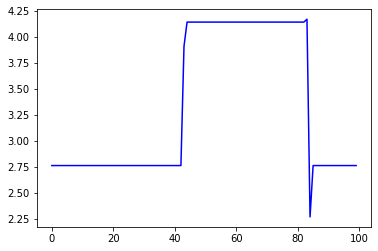

In [43]:

# cost function 직접 구현
cost_list = []
log = []
z = []
costsum = 0

import math
# loss 함수 = cost 함수 정의
def loss(sigmoid, label):
    return -(label * math.log(sigmoid+0.01) + (1 - label) * math.log(1 - sigmoid+0.01))

for i in range(trainingNum):
  temp = 0
  for n in range(M):
    sig_data=sigmoid(w0_list[i] + w1_list[i]*x[n] + w2_list[i]*y[n])
    temp+=loss(sig_data,label[n])
  cost=temp/M
  cost_list.append(cost)


# cost function 직접 구현
cost_list = []
log = []
z = []
costsum = 0

# loss 함수 = cost 함수 정의*
def loss(sigmoid, label):
    return -(label * math.log(sigmoid+0.001) + (1 - label) * math.log(1 - sigmoid+0.001))

for i in range(trainingNum):
  temp = 0
  for n in range(M):
    sig_data=sigmoid(w0_list[i] + w1_list[i]*x[n] + w2_list[i]*y[n])
    temp+=loss(sig_data,label[n])
  
  cost=temp/M
  cost_list.append(cost)
  sorted(cost_list)

plt.plot([i for i in range(len(cost_list))],cost_list,color='blue')

